## Text Analysis of "Meditations" by Marcus Aurelius 
Meditations is a series of personal writings by Marcus Aurelius, Roman Emperor from AD 161 to 180, recording his private notes to himself and ideas on Stoic philosophy. Marcus Aurelius wrote the 12 books of the Meditations in Koine Greek as a source for his own guidance and self-improvement.

In [1]:
import nltk # natural language processing
import matplotlib as plt # create plots
import seaborn as sns # create plots
import requests # download text

In [2]:
response = requests.get('http://classics.mit.edu/Antoninus/meditations.mb.txt')
data = response.text

## 1. Clean data

- Tokenize: separate whole text into"word-like" units into individual elements in a list, includes isolating punctuation 

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/stellajia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# import stop word file (made manual adjustments)
stop_words = open("buckley-salton.txt").read()

# remove stop words
words = [word for word in data.split() if word.lower() not in stop_words.split()]
cleaned_data = " ".join(words)

print("Old length: ", len(data))
print("New length: ", len(cleaned_data))

Old length:  244067
New length:  113895


In [5]:
# tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') # removes punctuation
data_words = tokenizer.tokenize(cleaned_data)
print("No punctuation length: ", len(data_words))

No punctuation length:  15185


In [6]:
data_text = nltk.Text(data_words, name="Meditations") # turn into nltk text object to apply more commands

## 2. Explore data

### What are the most common words?
Some words I wanted to point out in the top 20: man, nature, good, life, art, power, universe, soul, gods, mind. The variety in small scope (man, soul, mind) to large scope (nature, power, universe, gods) was interesting as philosophy often tackles the bridges between those two realms. 

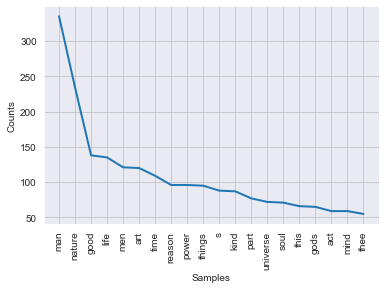

In [7]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(data_words)
nlp_words.plot(20);

### What are the most common bigrams?
In the future, I would need to figure out a way to accomodate to cases like ('man', 's') and ('s', 'nature'). The second case limits our understanding of what 'nature' is associated with which through concordances (scroll down) I found out was referring to "man's nature."

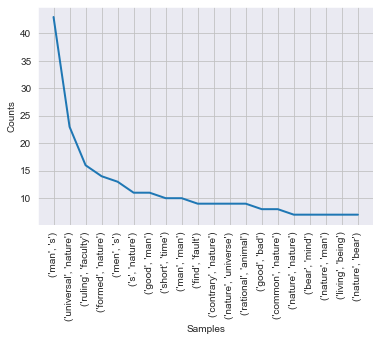

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
bigram = tuple(nltk.bigrams(data_words))
bigram_fd = nltk.FreqDist(nltk.bigrams(data_words))

sns.set_style('darkgrid')
bigram_fd.plot(20)

# figure out how to remove plural 's' -> lemmatize?
# (s, nature) refers to "man's nature"

In [9]:
data_text.collocations()

ruling faculty; universal nature; find fault; formed nature; wild
beasts; rational animal; short time; guilty impiety; fig tree; poor
flesh; political community; thousand years; ears corn; wrongful act;
sake superior; bear mind; acts unjustly; quiet last; freedom speech;
spinning thread


In [10]:
data_text.collocation_list()
# problem: removes singular 's' occurence which is associated with a word

[('ruling', 'faculty'),
 ('universal', 'nature'),
 ('find', 'fault'),
 ('formed', 'nature'),
 ('wild', 'beasts'),
 ('rational', 'animal'),
 ('short', 'time'),
 ('guilty', 'impiety'),
 ('fig', 'tree'),
 ('poor', 'flesh'),
 ('political', 'community'),
 ('thousand', 'years'),
 ('ears', 'corn'),
 ('wrongful', 'act'),
 ('sake', 'superior'),
 ('bear', 'mind'),
 ('acts', 'unjustly'),
 ('quiet', 'last'),
 ('freedom', 'speech'),
 ('spinning', 'thread')]

### How is 'nature' used in the text?
I wanted to explore 'nature' specifically because the high level understanding of Stoicism is to live in conformity with nature. It was interesting to see the variety of words that came before nature like mystery, love, universal, and conformity.

Below, I also tried to see if NLTK could identify words similar to nature based on probability, and the output isn't very promising. I think this has to do with 'nature' being referred to in a very abstract sense through this book.

In [11]:
# exact context 'nature' is used throughout the text
data_text.concordance('nature', lines=239)

Displaying 239 of 239 matches:
erly manner idea living conformably nature gravity affectation carefully inter
d clear frequent impressions living nature kind life is that depended gods gif
pirations hindered forthwith living nature fall short fault observing admoniti
l happen reason ignorance good evil nature good beautiful bad ugly nature wron
evil nature good beautiful bad ugly nature wrong akin me blood seed participat
rows upper lower teeth act contrary nature acting vexed turn away am flesh bre
s full Providence fortune separated nature interweaving involution ordered Pro
vantage universe art part good part nature nature brings serves maintain natur
 universe art part good part nature nature brings serves maintain nature unive
ature nature brings serves maintain nature universe preserved elements compoun
s minds necessity unhappy bear mind nature whole nature related that kind part
sity unhappy bear mind nature whole nature related that kind part kind whole h
d that kind part kind

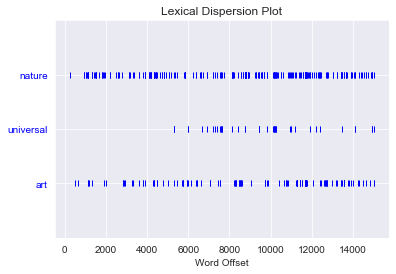

In [12]:
# similar to command-F 'nature' on a text
data_text.dispersion_plot(['nature', 'universal', 'art']) 

In [13]:
# words that nltk thinks are similar to 'nature' -> potential synonyms
data_text.similar('nature')

man art so happen constitution good things make write governed time
intelligent life live gods them this made intelligence contrary


In [14]:
# in this case it does identify 'men' which is in fact a synonym
data_text.similar('man')

nature life men good evil endure power necessity love bad art stay
person are rational fail sense constitution god nothing


### Sentiment Analysis
This was pretty cool. Stoicism preaches the state of tranquility which marks the absence of negative emotions and the presence of positive emotions. Based on the output, it is interesting to see that 53% of the text is neutral, 20% negative, and 27% positive.

In [15]:
# downloading sentiment tools
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stellajia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
# output of sentiment analysis
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_data)

{'neg': 0.204, 'neu': 0.53, 'pos': 0.266, 'compound': 1.0}

### What would a generated text of 'Meditations' look like?
For fun, I tested the NLTK generate function which attempts to create it's own version of the text using the text data.

In [17]:
data_text.generate()

Building ngram index...


outdoor dress kind write letters simplicity letter Rusticus wrote
Sinuessa mother respect offended words wrong easily disposed pacified
reconciled shown readiness reconciled read carefully satisfied
superficial understanding book hastily give assent talk overmuch
indebted acquainted discourses Epictetus communicated collection
Apollonius learned freedom undeviating steadiness purpose else moment
reason same sharp pains occasion loss child long illness living man
resolute yielding peevish giving instruction eyes man considered
experience skill expounding philosophical principles smallest merits
learned receive friends esteemed favours humbled letting pass
unnoticed Sextus benevolent disposition family governed fatherly
manner idea living conformably nature end journey content olive falls
ripe blessing


'outdoor dress kind write letters simplicity letter Rusticus wrote\nSinuessa mother respect offended words wrong easily disposed pacified\nreconciled shown readiness reconciled read carefully satisfied\nsuperficial understanding book hastily give assent talk overmuch\nindebted acquainted discourses Epictetus communicated collection\nApollonius learned freedom undeviating steadiness purpose else moment\nreason same sharp pains occasion loss child long illness living man\nresolute yielding peevish giving instruction eyes man considered\nexperience skill expounding philosophical principles smallest merits\nlearned receive friends esteemed favours humbled letting pass\nunnoticed Sextus benevolent disposition family governed fatherly\nmanner idea living conformably nature end journey content olive falls\nripe blessing'

## Things to try in the future...
- Analyze his work through the 12 books individually
- Pair this with history of Stoics?
- Figures in Stoicism?
- Computational literacy analysis: https://icla2022.jonreeve.com 